In [1]:
# -*- coding: utf-8
# Reinaldo Chaves (@paidatocandeira)
# Acessa o arquivo criado com pagamentos de empenho da covid19
# E faz diversas estatísticas
#

In [2]:
import pandas as pd

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
kwargs = {'sep': ',', 'dtype': str, 'encoding': 'utf-8'}
pagamentos_covid19 = pd.read_csv("resultados/pagamentos_covid19/pagamentos_feitos_de_empenhos_covid19_ate_15_outubro_2020.csv", **kwargs)

In [6]:
# Carrega nomes de colunas

In [5]:
list(pagamentos_covid19.columns.values.tolist())

['Id Empenho',
 'Código Empenho',
 'Código Empenho Resumido',
 'Data Emissão_x',
 'Código Tipo Documento_x',
 'Tipo Documento_x',
 'Tipo Empenho',
 'Espécie Empenho',
 'Código Órgão Superior_x',
 'Órgão Superior_x',
 'Código Órgão_x',
 'Órgão_x',
 'Código Unidade Gestora_x',
 'Unidade Gestora_x',
 'Código Gestão_x',
 'Gestão_x',
 'Código Favorecido_x',
 'Favorecido_x',
 'Observação_x',
 'Código Esfera Orçamentária',
 'Esfera Orçamentária',
 'Código Tipo Crédito',
 'Tipo Crédito',
 'Código Grupo Fonte Recurso',
 'Grupo Fonte Recurso',
 'Código Fonte Recurso',
 'Fonte Recurso',
 'Código Unidade Orçamentária',
 'Unidade Orçamentária',
 'Código Função',
 'Função',
 'Código SubFunção',
 'SubFunção',
 'Código Programa',
 'Programa',
 'Código Ação',
 'Ação',
 'Linguagem Cidadã',
 'Código Subtítulo (Localizador)',
 'Subtítulo (Localizador)',
 'Código Plano Orçamentário_x',
 'Plano Orçamentário_x',
 'Código Programa Governo_x',
 'Nome Programa Governo_x',
 'Autor Emenda',
 'Código Categoria de 

In [6]:
# Quantidade de favorecidos nos pagamentos

In [7]:
a = len(pagamentos_covid19['Favorecido_x'].value_counts())
a

8282

In [8]:
# Transforma em numero campos de valores

In [9]:
pagamentos_covid19['Valor Original do Empenho'] = pagamentos_covid19['Valor Original do Empenho'].str.replace(',','.')
pagamentos_covid19['Valor Original do Empenho'] = pagamentos_covid19['Valor Original do Empenho'].astype('float64') 

pagamentos_covid19['Valor do Empenho Convertido pra R$'] = pagamentos_covid19['Valor do Empenho Convertido pra R$'].str.replace(',','.')
pagamentos_covid19['Valor do Empenho Convertido pra R$'] = pagamentos_covid19['Valor do Empenho Convertido pra R$'].astype('float64') 

pagamentos_covid19['Valor Utilizado na Conversão_x'] = pagamentos_covid19['Valor Utilizado na Conversão_x'].str.replace(',','.')
pagamentos_covid19['Valor Utilizado na Conversão_x'] = pagamentos_covid19['Valor Utilizado na Conversão_x'].astype('float64') 

pagamentos_covid19['Valor Pago (R$)'] = pagamentos_covid19['Valor Pago (R$)'].str.replace(',','.')
pagamentos_covid19['Valor Pago (R$)'] = pagamentos_covid19['Valor Pago (R$)'].astype('float64') 
pagamentos_covid19.rename(columns = {'Valor Pago (R$)':'valor_pago_em_real'},inplace = True)

pagamentos_covid19['Valor Restos a Pagar Inscritos (R$)'] = pagamentos_covid19['Valor Restos a Pagar Inscritos (R$)'].str.replace(',','.')
pagamentos_covid19['Valor Restos a Pagar Inscritos (R$)'] = pagamentos_covid19['Valor Restos a Pagar Inscritos (R$)'].astype('float64') 

pagamentos_covid19['Valor Restos a Pagar Cancelado (R$)'] = pagamentos_covid19['Valor Restos a Pagar Cancelado (R$)'].str.replace(',','.')
pagamentos_covid19['Valor Restos a Pagar Cancelado (R$)'] = pagamentos_covid19['Valor Restos a Pagar Cancelado (R$)'].astype('float64') 

pagamentos_covid19['Valor Restos a Pagar Pagos (R$)'] = pagamentos_covid19['Valor Restos a Pagar Pagos (R$)'].str.replace(',','.')
pagamentos_covid19['Valor Restos a Pagar Pagos (R$)'] = pagamentos_covid19['Valor Restos a Pagar Pagos (R$)'].astype('float64') 

pagamentos_covid19['Valor Original do Pagamento'] = pagamentos_covid19['Valor Original do Pagamento'].str.replace(',','.')
pagamentos_covid19['Valor Original do Pagamento'] = pagamentos_covid19['Valor Original do Pagamento'].astype('float64') 

pagamentos_covid19['Valor do Pagamento Convertido pra R$'] = pagamentos_covid19['Valor do Pagamento Convertido pra R$'].str.replace(',','.')
pagamentos_covid19['Valor do Pagamento Convertido pra R$'] = pagamentos_covid19['Valor do Pagamento Convertido pra R$'].astype('float64') 

pagamentos_covid19['Valor Utilizado na Conversão_y'] = pagamentos_covid19['Valor Utilizado na Conversão_y'].str.replace(',','.')
pagamentos_covid19['Valor Utilizado na Conversão_y'] = pagamentos_covid19['Valor Utilizado na Conversão_y'].astype('float64') 

In [10]:
pagamentos_covid19['valor_pago_em_real'].sum()

38126776470.450005

In [11]:
pagamentos_covid19['Valor Original do Empenho'].sum()

169428238472.75

In [12]:
pagamentos_covid19['Valor do Empenho Convertido pra R$'].sum()

168755174071.79

In [13]:
# Média de valores pagos

In [14]:
pagamentos_covid19['valor_pago_em_real'].mean()

455658.5853484954

In [15]:
# Mediana de valores pagos

In [16]:
pagamentos_covid19['valor_pago_em_real'].median()

9075.075

In [17]:
# Moda de valores pagos

In [18]:
pagamentos_covid19['valor_pago_em_real'].mode()

0   100,000.00
dtype: float64

In [19]:
procura = pagamentos_covid19[(pagamentos_covid19['valor_pago_em_real'] == 100000)]

In [20]:
procura.shape

(3496, 103)

In [21]:
procura[["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]].head(10)

,Data Emissão_x,Código Empenho,Id Empenho,Órgão_x,Unidade Gestora_x,Código Favorecido_x,Favorecido_x,Valor do Empenho Convertido pra R$,valor_pago_em_real,Valor Restos a Pagar Inscritos (R$),Observação_x,Observação_y,Modalidade de Licitação
1136,28/07/2020,257001000012020NE848249,239600258,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
1137,28/07/2020,257001000012020NE848240,230500228,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
1142,28/07/2020,257001000012020NE848248,234100250,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
1146,28/07/2020,257001000012020NE848239,235900250,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
1183,28/07/2020,257001000012020NE848254,234700239,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
1186,28/07/2020,257001000012020NE848263,243400304,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
1187,28/07/2020,257001000012020NE848253,235500252,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
1191,28/07/2020,257001000012020NE848255,243000230,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
1192,28/07/2020,257001000012020NE848268,238900253,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
1193,28/07/2020,257001000012020NE848265,234800265,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica


In [22]:
# Maior valor originalmente empenhado

In [23]:
pagamentos_covid19['Valor do Empenho Convertido pra R$'].max()

1353600005.0

In [24]:
pagamentos_covid19.loc[pagamentos_covid19['Valor do Empenho Convertido pra R$'].idxmax()][["Data Emissão_x", "Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y", "Modalidade de Licitação"]]

Data Emissão_x                                                                15/09/2020
Código Empenho                                                   254445252012020NE803058
Id Empenho                                                                     254300072
Órgão_x                                                            Fundação Oswaldo Cruz
Unidade Gestora_x                             INSTITUTO DE TECNOLOGIA EM IMUNOBIOLOGICOS
Código Favorecido_x                                                            EX2544480
Favorecido_x                                                      ASTRAZENECA UK LIMITED
Valor do Empenho Convertido pra R$                                      1,353,600,005.00
valor_pago_em_real                                                        175,782,211.76
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x                           IMPORTACAO DE SERVICOS DE PESQUISA, DESENVOLVI...
Observação_y         

In [25]:
# Menor valor originalmente empenhado

In [26]:
pagamentos_covid19['Valor do Empenho Convertido pra R$'].min()

0.01

In [27]:
pagamentos_covid19.loc[pagamentos_covid19['Valor do Empenho Convertido pra R$'].idxmin()][["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y", "Modalidade de Licitação"]]

Data Emissão_x                                                                05/10/2020
Código Empenho                                                   160372000012020NE800352
Id Empenho                                                                     266300825
Órgão_x                                                              Comando do Exército
Unidade Gestora_x                                COMANDO DE ARTILHARIA DIVISIONARIA/3 RM
Código Favorecido_x                                                       92802784000190
Favorecido_x                                 COMPANHIA RIOGRANDENSE DE SANEAMENTO CORSAN
Valor do Empenho Convertido pra R$                                                  0.01
valor_pago_em_real                                                                 63.21
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x                           SERVICOS DE AGUA E ESGOTO (39-44) INEX 28/2013...
Observação_y         

In [28]:
# Maior valor pago em real 

In [29]:
pagamentos_covid19['valor_pago_em_real'].max()

991512000.0

In [30]:
pagamentos_covid19.loc[pagamentos_covid19['valor_pago_em_real'].idxmax()][["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

Data Emissão_x                                                                15/09/2020
Código Empenho                                                   254445252012020NE803058
Id Empenho                                                                     254300072
Órgão_x                                                            Fundação Oswaldo Cruz
Unidade Gestora_x                             INSTITUTO DE TECNOLOGIA EM IMUNOBIOLOGICOS
Código Favorecido_x                                                            EX2544480
Favorecido_x                                                      ASTRAZENECA UK LIMITED
Valor do Empenho Convertido pra R$                                      1,353,600,005.00
valor_pago_em_real                                                        991,512,000.00
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x                           IMPORTACAO DE SERVICOS DE PESQUISA, DESENVOLVI...
Observação_y         

In [31]:
# Menor valor pago em real 

In [32]:
pagamentos_covid19['valor_pago_em_real'].min()

-104197748.5

In [33]:
pagamentos_covid19.loc[pagamentos_covid19['valor_pago_em_real'].idxmin()][["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

Data Emissão_x                                                                20/08/2020
Código Empenho                                                   257001000012020NE863462
Id Empenho                                                                     233601397
Órgão_x                                    Ministério da Saúde - Unidades com vínculo di
Unidade Gestora_x                             DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE
Código Favorecido_x                                                               257001
Favorecido_x                                  DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE
Valor do Empenho Convertido pra R$                                        104,197,748.50
valor_pago_em_real                                                       -104,197,748.50
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x                           PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...
Observação_y         

In [34]:
# Agrupa a soma de valores pagos em Código Empenho+Id Empenho 

In [35]:
pagamentos_covid19.groupby(["Código Empenho", "Id Empenho"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

,Código Empenho,Id Empenho,valor_pago_em_real
18813,254445252012020NE803058,254300072,"1,284,023,632.94"
19113,257001000012020NE000043,269900981,"830,895,256.59"
18299,250005000012020NE000096,176600022,"694,320,000.00"
19281,257001000012020NE810544,174800424,"440,894,813.73"
19120,257001000012020NE453964,177001678,"415,121,875.00"
...,...,...,...
18051,240076000012020NE000338,202800038,-54.69
18114,240230000012020NE000216,243900086,-80.63
17957,240017000012020NE006844,243800153,-433.84
17825,240017000012020NE003889,177700824,-556.20


In [36]:
procura = pagamentos_covid19[(pagamentos_covid19['Código Empenho'] == '257001000012020NE810544') & (pagamentos_covid19['Id Empenho'] == '174800424')]

In [37]:
procura[["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

,Data Emissão_x,Código Empenho,Id Empenho,Órgão_x,Unidade Gestora_x,Código Favorecido_x,Favorecido_x,Valor do Empenho Convertido pra R$,valor_pago_em_real,Valor Restos a Pagar Inscritos (R$),Observação_x,Observação_y,Modalidade de Licitação
55723,09/04/2020,257001000012020NE810544,174800424,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"440,894,813.73","440,894,813.73",0.00,CORONAVIRUS (COVID-19)MUNICIPAL_PARCELA_UNICA_...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica


In [38]:
procura = pagamentos_covid19[(pagamentos_covid19['Código Empenho'] == '254445252012020NE803058') & (pagamentos_covid19['Id Empenho'] == '254300072')]

In [39]:
procura[["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

,Data Emissão_x,Código Empenho,Id Empenho,Órgão_x,Unidade Gestora_x,Código Favorecido_x,Favorecido_x,Valor do Empenho Convertido pra R$,valor_pago_em_real,Valor Restos a Pagar Inscritos (R$),Observação_x,Observação_y,Modalidade de Licitação
74739,15/09/2020,254445252012020NE803058,254300072,Fundação Oswaldo Cruz,INSTITUTO DE TECNOLOGIA EM IMUNOBIOLOGICOS,EX2544480,ASTRAZENECA UK LIMITED,"1,353,600,005.00","175,782,211.76",0.00,"IMPORTACAO DE SERVICOS DE PESQUISA, DESENVOLVI...",LIQUIDACAO REF. A CONTRATACAO DE SERVICO DE PE...,Dispensa de Licitação
74740,15/09/2020,254445252012020NE803058,254300072,Fundação Oswaldo Cruz,INSTITUTO DE TECNOLOGIA EM IMUNOBIOLOGICOS,EX2544480,ASTRAZENECA UK LIMITED,"1,353,600,005.00","116,729,421.18",0.00,"IMPORTACAO DE SERVICOS DE PESQUISA, DESENVOLVI...",LIQUIDACAO REF. A CONTRATACAO DE SERVICO DE PE...,Dispensa de Licitação
74741,15/09/2020,254445252012020NE803058,254300072,Fundação Oswaldo Cruz,INSTITUTO DE TECNOLOGIA EM IMUNOBIOLOGICOS,EX2544480,ASTRAZENECA UK LIMITED,"1,353,600,005.00","991,512,000.00",0.00,"IMPORTACAO DE SERVICOS DE PESQUISA, DESENVOLVI...",LIQUIDACAO REF. A CONTRATACAO DE SERVICO DE PE...,Dispensa de Licitação


In [40]:
# Agrupa a soma de valores pagos em Unidade Gestora - 20 primeiros

In [41]:
pagamentos_covid19.groupby(["Unidade Gestora_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Unidade Gestora_x,valor_pago_em_real
475,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"29,770,857,346.16"
600,FUNDO NACIONAL DE ASSISTENCIA SOCIAL,"2,500,988,343.31"
464,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,"1,574,130,839.71"
848,INSTITUTO DE TECNOLOGIA EM IMUNOBIOLOGICOS,"1,552,346,557.30"
416,COORDENACAO-GERAL DE GESTAO DE PESSOAS,"368,101,704.86"
595,FUNDAÇÃO OSWALDO CRUZ,"322,851,635.43"
885,SECR. DE GESTAO DO TRAB. E DA EDUC. NA SAUDE,"231,639,964.00"
599,FUNDO NAC.DE DESENV. CIENTIFICO E TECNOLOGICO,"134,584,793.08"
418,COORDENAÇÃO GERAL DE INFRAESTRUTURA DOS CAMPI,"109,197,917.01"
601,FUNDO NACIONAL DE SEGURANÇA PÚBLICA - FNSP,"83,913,913.16"


In [42]:
# Salva em CSV para gráfico

In [43]:
salva = pagamentos_covid19.groupby(["Unidade Gestora_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

In [44]:
salva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 475 to 624
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unidade Gestora_x   1011 non-null   object 
 1   valor_pago_em_real  1011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.7+ KB


In [45]:
salva.to_csv('resultados/graficos/soma_ordenada_unidade_gestora_pagamentos_feitos_de_empenhos_covid19_ate_15_outubro_2020.csv', index=False)

In [46]:
# Detalha DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE

In [47]:
procura = pagamentos_covid19[(pagamentos_covid19['Unidade Gestora_x'] == 'DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE') ]
procura.groupby(["Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Favorecido_x,valor_pago_em_real
1,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"26,072,842,296.92"
0,CONTRIBUICAO A ALIANCA GLOBAL PARA VACINAS E I...,"830,895,256.59"
19,FUNDO ESTADUAL DE SAUDE,"633,275,829.00"
807,ORGANIZACAO PAN-AMERICANA DA SAUDE/ORGANIZACAO...,"451,471,585.65"
42,FUNDO MUNICIPAL DE SAUDE,"371,612,083.00"
21,FUNDO ESTADUAL DE SAUDE - FUNDES,"223,106,330.00"
23,FUNDO ESTADUAL DE SAUDE DO ESTADO DA BAHIA,"98,779,559.00"
8,FUNDO DE SAUDE DO DISTRITO FEDERAL,"83,252,401.00"
49,FUNDO MUNICIPAL DE SAUDE - FMS,"71,191,675.00"
22,FUNDO ESTADUAL DE SAUDE DE PERNAMBUCO,"61,071,264.00"


In [48]:
# Detalha DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG

In [49]:
procura = pagamentos_covid19[(pagamentos_covid19['Unidade Gestora_x'] == 'DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG') ]
procura.groupby(["Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Favorecido_x,valor_pago_em_real
12,GLOBAL BASE DEVELOPMENT HK LIMITED,"708,226,249.50"
15,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00"
26,MAGNAMED TECNOLOGIA MEDICA S/A,"229,299,270.00"
18,"KTK INDUSTRIA, IMPORTACAO, EXPORTACAO E COMERC...","78,000,000.00"
20,LEISTUNG EQUIPAMENTOS LTDA.,"66,037,000.00"
21,LIFEMED INDUSTRIAL DE EQUIPAMENTOS E ARTIGOS M...,"34,522,950.00"
8,DESCARPACK DESCARTAVEIS DO BRASIL LTDA,"30,544,000.00"
45,WEG DRIVES & CONTROLS - AUTOMACAO LTDA,"30,000,000.00"
7,CRISTALIA PRODUTOS QUIMICOS FARMACEUTICOS LTDA,"27,629,712.00"
30,PRODUTOS ROCHE QUIMICOS E FARMACEUTICOS S A,"26,650,000.00"


In [50]:
procura['valor_pago_em_real'].sum()

1574130839.71

In [51]:
# FUNDO NACIONAL DE ASSISTENCIA SOCIAL

In [52]:
procura = pagamentos_covid19[(pagamentos_covid19['Unidade Gestora_x'] == 'FUNDO NACIONAL DE ASSISTENCIA SOCIAL') ]
procura.groupby(["Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Favorecido_x,valor_pago_em_real
13,FUNDO NACIONAL DE ASSISTENCIA SOCIAL,"2,443,433,244.31"
11,FUNDO MUNICIPAL DE ASSISTENCIA SOCIAL- (FMAS) ...,"19,138,597.00"
1,FUNDO ESTADUAL DE ASSISTENCIA SOCIAL - FEAS,"9,514,018.00"
14,"MUNICIPIO DE JABOATAO - FUNDO MUNICIPAL ,DE AS...","7,538,195.00"
0,FUNDO ESTADUAL DE ASSISTENCIA SOCIAL,"7,432,147.00"
8,FUNDO MUNICIPAL DE ASSISTENCIA SOCIAL DE SANTANA,"6,500,000.00"
3,FUNDO MUNICIPAL DE ASSISTENCIA SOCIAL,"1,855,357.00"
7,FUNDO MUNICIPAL DE ASSISTENCIA SOCIAL DE LARAN...,"1,200,000.00"
12,FUNDO MUNICIPAL DE ASSISTENCIA SOCIAL-FMAS,"855,357.00"
2,FUNDO MUNICIPAL DA ASSISTENCIA SOCIAL DE MAZAGAO,"800,000.00"


In [53]:
# Agrupa a soma de valores pagos em Gestão - 20 primeiros

In [54]:
pagamentos_covid19.groupby(["Gestão_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Gestão_x,valor_pago_em_real
64,TESOURO NACIONAL,"35,418,353,390.48"
8,FUNDACAO OSWALDO CRUZ,"2,076,135,245.82"
4,EMPRESA BRASILEIRA DE SERVICOS HOSPITALARES,"165,955,087.21"
1,COMPANHIA NACIONAL DE ABASTECIMENTO,"109,335,671.36"
2,CONSELHO NAC.DE DESENV.CIENTIFICO TECNOLOGICO,"68,958,137.31"
25,HOSPITAL DE CLINICAS DE PORTO ALEGRE,"67,126,020.82"
93,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,"31,386,213.34"
77,UNIVERSIDADE FEDERAL DE MINAS GERAIS,"20,803,835.68"
26,HOSPITAL NOSSA SENHORA DA CONCEICAO S/A,"19,587,639.31"
7,FUNDACAO NACIONAL DO INDIO,"15,005,760.96"


In [55]:
# Agrupa a soma de valores pagos em Favorecido - 20 primeiros

In [56]:
pagamentos_covid19.groupby(["Favorecido_x", "Código Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Favorecido_x,Código Favorecido_x,valor_pago_em_real
2614,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,"26,072,842,296.92"
4701,FUNDO NACIONAL DE ASSISTENCIA SOCIAL,330013,"2,443,433,244.31"
1171,ASTRAZENECA UK LIMITED,EX2544480,"1,284,023,632.94"
2102,CONTRIBUICAO A ALIANCA GLOBAL PARA VACINAS E I...,EX0250046,"830,895,256.59"
4853,GLOBAL BASE DEVELOPMENT HK LIMITED,EX2590112,"708,226,249.50"
7035,ORGANIZACAO PAN-AMERICANA DA SAUDE/ORGANIZACAO...,04096431000154,"451,471,585.65"
2292,COORDENACAO-GERAL DE GESTAO DE PESSOAS,250006,"307,034,833.78"
5342,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,49520521000169,"258,180,000.00"
1261,BANCO DO BRASIL SA,00000000000191,"234,107,373.56"
6212,MAGNAMED TECNOLOGIA MEDICA S/A,01298443000254,"229,299,270.00"


In [57]:
procura = pagamentos_covid19[(pagamentos_covid19['Código Favorecido_x'] == '49520521000169') ]

In [58]:
procura.groupby(["Código Empenho", "Id Empenho"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

,Código Empenho,Id Empenho,valor_pago_em_real
1,250005000012020NE000104,178500504,"258,000,000.00"
0,160166000012020NE800016,182300433,"180,000.00"


In [59]:
procura[["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

,Data Emissão_x,Código Empenho,Id Empenho,Órgão_x,Unidade Gestora_x,Código Favorecido_x,Favorecido_x,Valor do Empenho Convertido pra R$,valor_pago_em_real,Valor Restos a Pagar Inscritos (R$),Observação_x,Observação_y,Modalidade de Licitação
54350,09/04/2020,160166000012020NE800016,182300433,Comando do Exército,HOSPITAL GERAL DE BELEM,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"180,000.00","10,530.00",0.00,"AQUIS DE MAT PERM P DIV AP TEC DO HGEBE, CONF ...",RETENCAO DA NFE 53339 DE 05/08/2020 NO VALOR D...,Dispensa de Licitação
54351,09/04/2020,160166000012020NE800016,182300433,Comando do Exército,HOSPITAL GERAL DE BELEM,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"180,000.00","169,470.00",0.00,"AQUIS DE MAT PERM P DIV AP TEC DO HGEBE, CONF ...",PAGAMENTO DA NFE 53339 DE 05/08/2020 NO VALOR ...,Dispensa de Licitação
71000,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","45,630.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,"TRIBUTOS FEDERAIS 5,85 RECEITA 6147 IN 1234/20...",Não se Aplica
71001,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","351,000.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,"TRIBUTOS FEDERAIS 5,85 RECEITA 6147 IN 1234/20...",Não se Aplica
71002,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","351,000.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,"TRIBUTOS FEDERAIS 5,85 RECEITA 6147 IN 1234/20...",Não se Aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71069,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","2,485,560.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,"PAGAMENTO PARA COMPRA DE 44 VENTILADORES IX5, ...",Não se Aplica
71070,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","1,694,700.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,"PAGAMENTO PARA COMPRA DE 30 VENTILADORES IX5, ...",Não se Aplica
71071,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","1,694,700.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,"PAGAMENTO PARA COMPRA DE 30 VENTILADORES IX5, ...",Não se Aplica
71072,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","8,301,150.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,IN 1234/2012,Não se Aplica


In [60]:
procura = pagamentos_covid19[(pagamentos_covid19['Código Favorecido_x'] == 'EX2590112') ]

In [61]:
procura['valor_pago_em_real'].sum()

708226249.5

In [62]:
# Salva um CSV para criar gráfico

In [63]:
salva = pagamentos_covid19.groupby(["Favorecido_x", "Código Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

In [64]:
salva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8891 entries, 2614 to 2918
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Favorecido_x         8891 non-null   object 
 1   Código Favorecido_x  8891 non-null   object 
 2   valor_pago_em_real   8891 non-null   float64
dtypes: float64(1), object(2)
memory usage: 277.8+ KB


In [65]:
salva.to_csv('resultados/graficos/soma_ordenada_favorecidos_pagamentos_feitos_de_empenhos_covid19_ate_15_outubro_2020.csv', index=False)

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [68]:
graf = pagamentos_covid19.groupby(["Favorecido_x", "Código Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(15)
graf.rename(columns = {'Favorecido_x':'instituicao_empresa_favorecida'},inplace = True)
graf.rename(columns = {'Código Favorecido_x':'cod_favorecido'},inplace = True)

In [69]:
graf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 2614 to 3459
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   instituicao_empresa_favorecida  15 non-null     object 
 1   cod_favorecido                  15 non-null     object 
 2   valor_pago_em_real              15 non-null     float64
dtypes: float64(1), object(2)
memory usage: 480.0+ bytes


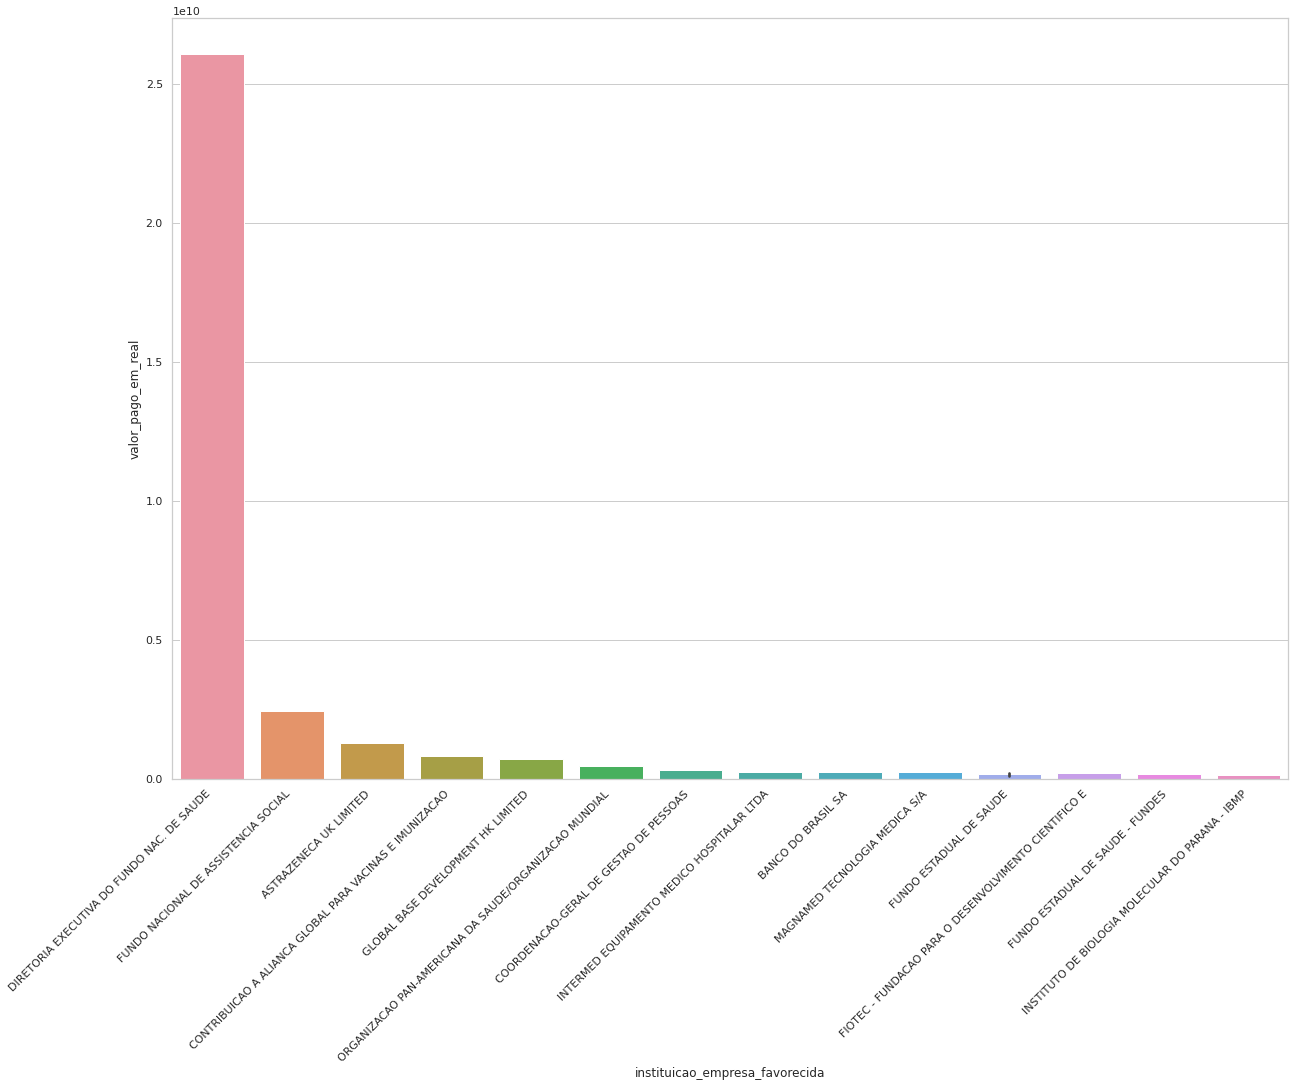

In [70]:
sns.set(style="whitegrid")

fig_dims = (20, 14)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45, ha='right')

ax = sns.barplot(x="instituicao_empresa_favorecida", y="valor_pago_em_real", data=graf)

In [71]:
# Soma valores em sigilo

In [72]:
sigilo = pagamentos_covid19[(pagamentos_covid19['Favorecido_x'] == 'Informação protegida por sigilo nos termos da legislaçã') |  
                           (pagamentos_covid19['Código Favorecido_x'] == '-11')]

In [73]:
sigilo['valor_pago_em_real'].sum()

2349625.8

In [74]:
# Máximo em sigilo

In [75]:
sigilo.loc[sigilo['valor_pago_em_real'].idxmax()][["Data Emissão_x","Código Empenho", "Id Empenho", "Código Empenho Resumido", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

Data Emissão_x                                                                09/07/2020
Código Empenho                                                   160062000012020NE000088
Id Empenho                                                                     207201212
Código Empenho Resumido                                                     2020NE000088
Órgão_x                                                              Comando do Exército
Unidade Gestora_x                                     CENTRO DE INTELIGENCIA DO EXERCITO
Código Favorecido_x                                                                  -11
Favorecido_x                           Informação protegida por sigilo nos termos da ...
Valor do Empenho Convertido pra R$                                            400,000.00
valor_pago_em_real                                                            400,000.00
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x         

In [76]:
sigilo.to_csv('resultados/graficos/valores_pagos_em_sigilo_covid19_ate_15_outubro_2020.csv', index=False)

In [77]:
# Soma valores por autores de Emenda

In [78]:
emendas = pagamentos_covid19[(pagamentos_covid19['Autor Emenda'] != 'SEM EMENDA')]

In [79]:
emendas['valor_pago_em_real'].sum()

2350653088.5299997

In [80]:
emendas.groupby(["Autor Emenda"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Autor Emenda,valor_pago_em_real
22,BANCADA DA BAHIA / EMENDA 4,"192,946,250.00"
62,BANCADA DO CEARA / EMENDA 14,"181,066,340.00"
61,BANCADA DO AMAZONAS / EMENDA 5,"116,834,308.00"
42,BANCADA DE SAO PAULO / EMENDA 1,"106,662,280.00"
30,BANCADA DE GOIAS / EMENDA 7,"92,210,658.00"
66,BANCADA DO MARANHAO / EMENDA 3,"81,542,300.00"
63,BANCADA DO DISTRITO FEDERAL / EMENDA 3,"70,825,704.00"
52,BANCADA DE SERGIPE / EMENDA 8,"56,923,875.00"
77,BANCADA DO RIO DE JANEIRO / EMENDA 2,"53,215,190.00"
73,BANCADA DO PARA / EMENDA 4,"53,075,862.00"


In [81]:
# Salva em CSV para gráfico

In [82]:
salva = emendas.groupby(["Autor Emenda"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

In [83]:
salva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 22 to 112
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Autor Emenda        332 non-null    object 
 1   valor_pago_em_real  332 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [84]:
salva.to_csv('resultados/graficos/soma_ordenada_emendas_pagamentos_feitos_de_empenhos_covid19_ate_15_outubro_2020.csv', index=False)